In [2]:
# Credits: https://github.com/keras-team/keras/blob/master/examples/mnist_cnn.py

import warnings
warnings.filterwarnings('ignore')
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from keras.layers.normalization import BatchNormalization

batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

history=model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 6s 94us/step - loss: 0.2659 - acc: 0.9179 - val_loss: 0.0594 - val_acc: 0.9811
Epoch 2/12
60000/60000 [==============================] - 5s 83us/step - loss: 0.0866 - acc: 0.9738 - val_loss: 0.0406 - val_acc: 0.9853
Epoch 3/12
60000/60000 [==============================] - 5s 86us/step - loss: 0.0674 - acc: 0.9797 - val_loss: 0.0362 - val_acc: 0.9878
Epoch 4/12
60000/60000 [==============================] - 5s 83us/step - loss: 0.0559 - acc: 0.9828 - val_loss: 0.0308 - val_acc: 0.9898
Epoch 5/12
60000/60000 [==============================] - 5s 85us/step - loss: 0.0483 - acc: 0.9856 - val_loss: 0.0303 - val_acc: 0.9890
Epoch 6/12
60000/60000 [==============================] - 5s 85us/step - loss: 0.0398 - acc: 0.9881 - val_loss: 0.0290 - val_acc: 0.9901
Epoch 7/12
60000/60000 [==============================]

In [0]:
%matplotlib notebook
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import time
# https://gist.github.com/greydanus/f6eee59eaf1d90fcb3b534a25362cea4
# https://stackoverflow.com/a/14434334
# this function is used to update the plots for each epoch and error
def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()

Test score: 0.02626945600984918
Test accuracy: 0.9916


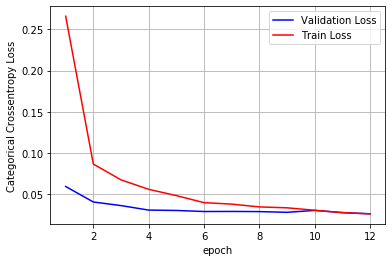

In [4]:
score = model.evaluate(x_test, y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

In [5]:
warnings.filterwarnings('ignore')
model = Sequential()
model.add(Conv2D(32, kernel_size=(2, 2),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (2, 2), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

history=model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 6s 100us/step - loss: 0.2375 - acc: 0.9286 - val_loss: 0.0558 - val_acc: 0.9823
Epoch 2/12
60000/60000 [==============================] - 5s 87us/step - loss: 0.0922 - acc: 0.9731 - val_loss: 0.0482 - val_acc: 0.9855
Epoch 3/12
60000/60000 [==============================] - 5s 87us/step - loss: 0.0665 - acc: 0.9804 - val_loss: 0.0560 - val_acc: 0.9831
Epoch 4/12
60000/60000 [==============================] - 5s 88us/step - loss: 0.0582 - acc: 0.9834 - val_loss: 0.0747 - val_acc: 0.9802
Epoch 5/12
60000/60000 [==============================] - 5s 87us/step - loss: 0.0496 - acc: 0.9853 - val_loss: 0.0478 - val_acc: 0.9873
Epoch 6/12
60000/60000 [==============================] - 5s 87us/step - loss: 0.0482 - acc: 0.9859 - val_loss: 0.0534 - val_acc: 0.9866
Epoch 7/12
60000/60000 [==============================] - 5s 89us/step - loss: 0.0416 - acc: 0.9877 - val_loss: 0.0578 - val_a

Test score: 0.06301421675248749
Test accuracy: 0.9874


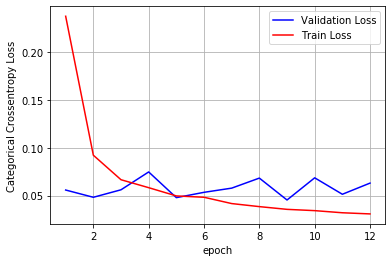

In [6]:
score = model.evaluate(x_test, y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

In [7]:
warnings.filterwarnings('ignore')69
model = Sequential()
model.add(Conv2D(64, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Dropout(0.35))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(Dropout(0.25))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

history=model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 14s 226us/step - loss: 0.2876 - acc: 0.9182 - val_loss: 0.0550 - val_acc: 0.9830
Epoch 2/12
60000/60000 [==============================] - 12s 204us/step - loss: 0.0977 - acc: 0.9723 - val_loss: 0.0565 - val_acc: 0.9839
Epoch 3/12
60000/60000 [==============================] - 12s 204us/step - loss: 0.0758 - acc: 0.9800 - val_loss: 0.0413 - val_acc: 0.9870
Epoch 4/12
60000/60000 [==============================] - 12s 206us/step - loss: 0.0627 - acc: 0.9830 - val_loss: 0.0413 - val_acc: 0.9893
Epoch 5/12
60000/60000 [==============================] - 12s 205us/step - loss: 0.0516 - acc: 0.9853 - val_loss: 0.0306 - val_acc: 0.9898
Epoch 6/12
60000/60000 [==============================] - 12s 205us/step - loss: 0.0435 - acc: 0.9879 - val_loss: 0.0369 - val_acc: 0.9891
Epoch 7/12
60000/60000 [==============================] - 12s 204us/step - loss: 0.0428 - acc: 0.9881 - val_loss: 0.

Test score: 0.03671459837800094
Test accuracy: 0.9908


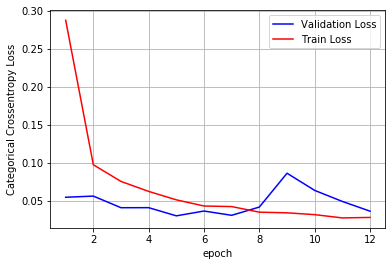

In [8]:
score = model.evaluate(x_test, y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

In [9]:
warnings.filterwarnings('ignore')
model = Sequential()
model.add(Conv2D(64, kernel_size=(5, 5),
                 activation='relu',
                 input_shape=input_shape))
model.add(Dropout(0.35))
model.add(BatchNormalization())
model.add(Conv2D(128, (5, 5), activation='relu'))
model.add(Conv2D(256, (5, 5), activation='relu'))
model.add(Dropout(0.25))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(1, 1)))
model.add(Conv2D(64, (5, 5), activation='relu'))
model.add(Conv2D(16, (5, 5), activation='relu'))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

history=model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 24s 408us/step - loss: 0.2044 - acc: 0.9390 - val_loss: 0.1035 - val_acc: 0.9741
Epoch 2/12
60000/60000 [==============================] - 22s 368us/step - loss: 0.0675 - acc: 0.9811 - val_loss: 0.0441 - val_acc: 0.9881
Epoch 3/12
60000/60000 [==============================] - 22s 372us/step - loss: 0.0451 - acc: 0.9875 - val_loss: 0.0386 - val_acc: 0.9917
Epoch 4/12
60000/60000 [==============================] - 22s 369us/step - loss: 0.0375 - acc: 0.9894 - val_loss: 0.0241 - val_acc: 0.9937
Epoch 5/12
60000/60000 [==============================] - 22s 367us/step - loss: 0.0339 - acc: 0.9901 - val_loss: 0.0242 - val_acc: 0.9934
Epoch 6/12
60000/60000 [==============================] - 22s 368us/step - loss: 0.0270 - acc: 0.9924 - val_loss: 0.0443 - val_acc: 0.9911
Epoch 7/12
60000/60000 [==============================] - 22s 368us/step - loss: 0.0238 - acc: 0.9933 - val_loss: 0.

Test score: 0.030283799503118554
Test accuracy: 0.9923


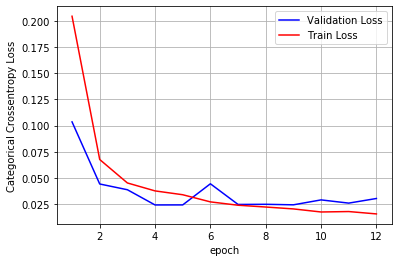

In [10]:
score = model.evaluate(x_test, y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

In [11]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(2, 2),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Conv2D(256, (4, 4), activation='relu'))
model.add(Dropout(0.35))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))
model.add(BatchNormalization())
model.add(Conv2D(64, (2, 2), activation='relu'))
model.add(Dropout(0.4))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

history=model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 12s 197us/step - loss: 0.3463 - acc: 0.8940 - val_loss: 0.0612 - val_acc: 0.9862
Epoch 2/12
60000/60000 [==============================] - 10s 163us/step - loss: 0.0846 - acc: 0.9762 - val_loss: 0.0506 - val_acc: 0.9889
Epoch 3/12
60000/60000 [==============================] - 10s 165us/step - loss: 0.0588 - acc: 0.9836 - val_loss: 0.0454 - val_acc: 0.9888
Epoch 4/12
60000/60000 [==============================] - 10s 166us/step - loss: 0.0475 - acc: 0.9864 - val_loss: 0.0343 - val_acc: 0.9920
Epoch 5/12
60000/60000 [==============================] - 10s 166us/step - loss: 0.0429 - acc: 0.9880 - val_loss: 0.0378 - val_acc: 0.9904
Epoch 6/12
60000/60000 [==============================] - 10s 165us/step - loss: 0.0374 - acc: 0.9895 - val_loss: 0.0312 - val_acc: 0.9923
Epoch 7/12
60000/60000 [==============================] - 10s 164us/step - loss: 0.0335 - acc: 0.9905 - val_loss: 0.

Test score: 0.02236158835059032
Test accuracy: 0.9941


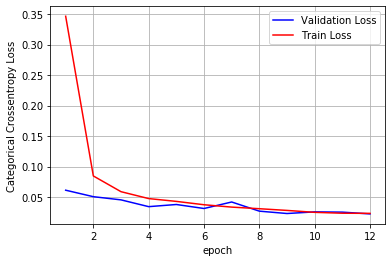

In [12]:
score = model.evaluate(x_test, y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

In [13]:
warnings.filterwarnings('ignore')
model = Sequential()
model.add(Conv2D(64, kernel_size=(7, 7),
                 activation='relu',
                 input_shape=input_shape))
model.add(Dropout(0.35))
model.add(BatchNormalization())
model.add(Conv2D(128, (7, 7), activation='relu'))
model.add(Conv2D(256, (7, 7), activation='relu'))
model.add(Dropout(0.25))
model.add(BatchNormalization())
model.add(Conv2D(128, (7, 7), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(128, (4, 4), activation='relu'))
model.add(Dropout(0.4))
model.add(BatchNormalization())
model.add(Conv2D(32, (1, 1), activation='relu'))
model.add(Dropout(0.275))
model.add(MaxPooling2D(pool_size=(1, 1)))
model.add(Conv2D(8, (1, 1), activation='relu'))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

history=model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 24s 405us/step - loss: 0.4530 - acc: 0.8667 - val_loss: 0.1352 - val_acc: 0.9764
Epoch 2/12
60000/60000 [==============================] - 21s 354us/step - loss: 0.1109 - acc: 0.9754 - val_loss: 0.0770 - val_acc: 0.9848
Epoch 3/12
60000/60000 [==============================] - 21s 357us/step - loss: 0.0806 - acc: 0.9823 - val_loss: 0.0442 - val_acc: 0.9900
Epoch 4/12
60000/60000 [==============================] - 21s 353us/step - loss: 0.0652 - acc: 0.9861 - val_loss: 0.0627 - val_acc: 0.9872
Epoch 5/12
60000/60000 [==============================] - 21s 352us/step - loss: 0.0550 - acc: 0.9879 - val_loss: 0.0403 - val_acc: 0.9925
Epoch 6/12
60000/60000 [==============================] - 21s 353us/step - loss: 0.0523 - acc: 0.9889 - val_loss: 0.0444 - val_acc: 0.9910
Epoch 7/12
60000/60000 [==============================] - 21s 355us/step - loss: 0.0436 - acc: 0.9902 - val_loss: 0.

Test score: 0.04352422992484726
Test accuracy: 0.9931


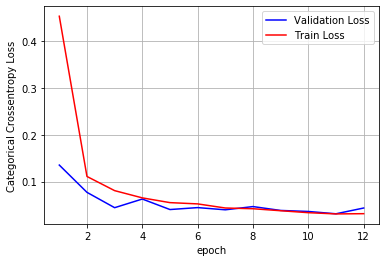

In [14]:
score = model.evaluate(x_test, y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

## Conclusions

In this assignment I tried to implement different CNN architectures, each with different kernel sizes and different number of convolutional layers(2, 3, 5, and 7 layers). I also used different combinations of dropout layers, batch normalizations and maxpooling.

Of all the architectures that I tried, the model with different kernel sizes for each layer((2,2),(5,5),(3,3),(4,4),(2,2)), and 5 convolutional layers gave the best results.

This model gave a Test loss of approximately 0.02236, and a Test accuracy of 0.9941. The difference between train loss and test loss is small, therefore there is no overfitting in this case. 

This is a better result than that of the original architecture provided in the notebook(Test loss=0.026269, Test accuracy=0.9916).